# Tensorflow Model Perceptron
Author: Muhamad Ibnu Khaidar Hafiz

Kelompok 1 Algoritma Deep Learning

Kelas 4IA15

Anggota:
1. A IAS Falah Surya Gemilang (50421001)
2. Aldo Rizky Ramadhan (50421106)
3. Faiz Rizki Azmi (50421454)
4. Muhamad Ibnu Khaidar Hafiz (50421867)
5. Siti Asma Tomu (51421427)


## Import Tensorflow

In [1]:
import tensorflow as tf

2024-10-20 14:00:56.535576: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-20 14:00:56.553490: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-20 14:00:56.574179: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-20 14:00:56.580485: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-20 14:00:56.596205: I tensorflow/core/platform/cpu_feature_guar

In [2]:
# cek versi tensorflow
tf.__version__

'2.17.0'

In [3]:
# cek device yang tersedia untuk tensorflow
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
!nvidia-smi

Sun Oct 20 14:01:01 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.90.07              Driver Version: 550.90.07      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA L4                      On  |   00000000:00:03.0 Off |                    0 |
| N/A   63C    P8             19W /   72W |       4MiB /  23034MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## Data Preprocessing

In [ ]:
# import os
# import wget
# import zipfile

# # URLs for the datasets
# url_10_class = "https://drive.google.com/uc?id=1p8Flgeg-pd1pNdc4-KMO3vKlT8XLc1wt"
# url_3_class = "https://drive.google.com/uc?id=1Q2P5aRAs04egYSccMXJanY44ABlJcHVf"
# output = "dataset.zip"

# # Download the dataset using wget
# wget.download(url_3_class, output)

# # Unzip the downloaded file
# with zipfile.ZipFile(output, 'r') as zip_ref:
#     zip_ref.extractall("dataset")

# # Optionally, remove the zip file after extraction
# os.remove(output)

In [5]:
# install gdown untuk mendownload file dari google drive
# !pip install gdown

In [6]:
# # download dataset dari google drive menggunakan gdown
# import gdown
# url_10_class = "https://drive.google.com/uc?id=1p8Flgeg-pd1pNdc4-KMO3vKlT8XLc1wt"
# url_3_class = "https://drive.google.com/uc?id=1Q2P5aRAs04egYSccMXJanY44ABlJcHVf"
# output = "dataset.zip"
# gdown.download(url=url_3_class, output=output)

In [8]:
# # unzip dataset yang telah didownload
# import zipfile
# with zipfile.ZipFile(output, 'r') as zip_ref:
#     zip_ref.extractall("dataset")

In [9]:
# cek isi dari direktori dengan fungsi walk_through_dir
def walk_through_dir(dir_path):
    """
    Walks through dir_path and prints out its contents.

    Args:
        dir_path (str): target directory

    Prints:
        number of subdirectories in dir_path
        number of images (files) in each subdirectory
        name of each subdirectory
    """
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [10]:
# cek isi dari direktori dataset
import os
walk_through_dir('dataset/')

There are 2 directories and 0 images in 'dataset/'.
There are 3 directories and 0 images in 'dataset/test'.
There are 0 directories and 250 images in 'dataset/test/french_fries'.
There are 0 directories and 250 images in 'dataset/test/donuts'.
There are 0 directories and 250 images in 'dataset/test/pizza'.
There are 3 directories and 0 images in 'dataset/train'.
There are 0 directories and 750 images in 'dataset/train/french_fries'.
There are 0 directories and 750 images in 'dataset/train/donuts'.
There are 0 directories and 750 images in 'dataset/train/pizza'.


### Melihat contoh gambar dari dataset secara acak

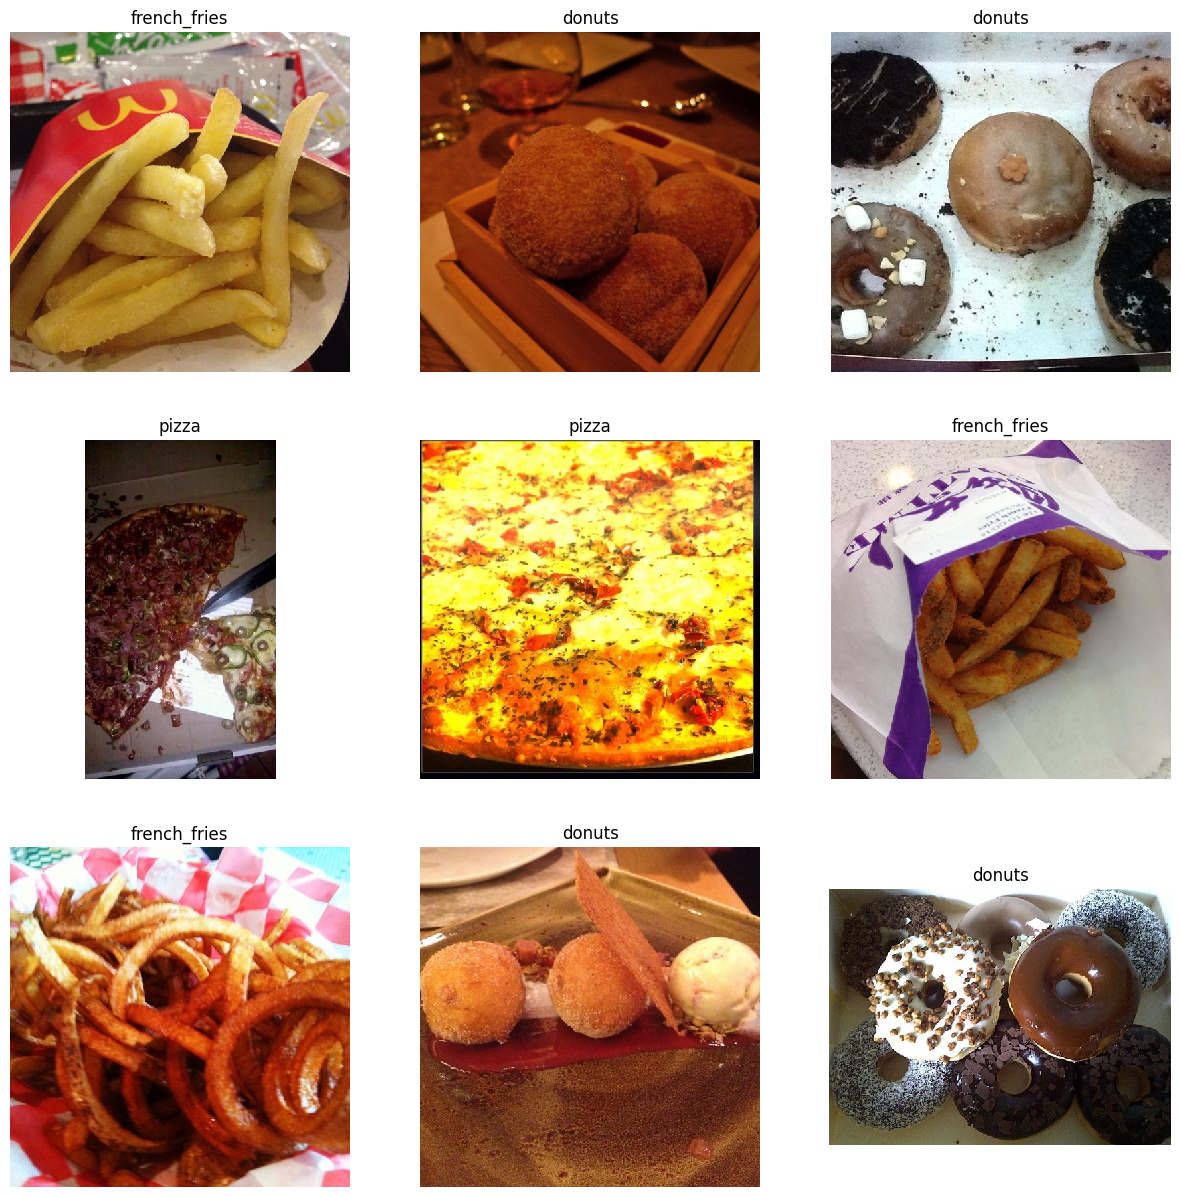

In [11]:
import random
from glob import glob
import os
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

image_path = Path('dataset/')
train_dir = image_path / 'train'
test_dir = image_path / 'test'

image_path_list = list(image_path.glob('*/*/*.jpg'))

fig, ax = plt.subplots(3, 3, figsize=(15, 15))
for i in range(3):
    for j in range(3):
        img_path = random.choice(image_path_list)
        image_class = img_path.parent.stem
        
        img = plt.imread(img_path)
        ax[j, i].imshow(img, interpolation='none')
        ax[j, i].axis('off')
        ax[j, i].set_title(image_class)
        
plt.show()

### Load Dataset

In [12]:
# Buat hyperparameter batch_size, img_height, dan img_width
BATCH_SIZE = 32
IMG_HEIGHT = 224
IMG_WIDTH = 224

In [13]:
# Buat dataset menggunakan tf.keras.utils.image_dataset_from_directory
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    shuffle=True,
    batch_size=BATCH_SIZE,
    image_size=(IMG_HEIGHT, IMG_WIDTH)
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    shuffle=False,
    batch_size=BATCH_SIZE,
    image_size=(IMG_HEIGHT, IMG_WIDTH)
)

Found 2250 files belonging to 3 classes.


2024-10-20 14:01:35.169564: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 20750 MB memory:  -> device: 0, name: NVIDIA L4, pci bus id: 0000:00:03.0, compute capability: 8.9


Found 750 files belonging to 3 classes.


In [14]:
# cek class names
class_names = train_dataset.class_names
class_names

['donuts', 'french_fries', 'pizza']

In [15]:
num_classes = len(class_names)
num_classes

3

In [15]:
# # gunakan autotune untuk mempercepat proses loading dataset, karena dataset ini ada banyak sekali gambarnya
# AUTOTUNE = tf.data.AUTOTUNE

# train_dataset = train_dataset.cache().prefetch(buffer_size=AUTOTUNE)
# validation_dataset = validation_dataset.cache().prefetch(buffer_size=AUTOTUNE)

### Image Augmentation

In [16]:
image_augmentation = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.RandomFlip('horizontal'),
    # tf.keras.layers.RandomFlip('vertical'),
])

## Model Perceptron

Menggunakan arsitektur dari VGG19

In [17]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

In [18]:
model = Sequential([
    Input(shape=(224, 224, 3)),
    image_augmentation,
    
    # Bagian 1
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), strides=(2, 2)),
    
    # Bagian 2
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), strides=(2, 2)),
    
    # Bagian 3
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), strides=(2, 2)),
    
    # Bagian 4
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), strides=(2, 2)),
    
    # Bagian FC
    Flatten(),
    # Dense(1024, activation='relu'),
    Dense(1024, activation='relu'),
    # Output layer berupa x buah neuron yang merepresentasikan 9 kelas yang ada
    Dense(num_classes, activation='softmax')
])

In [19]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
loss = tf.keras.losses.SparseCategoricalCrossentropy()

In [20]:
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [22]:
# create callback untuk menghentikan training jika akurasi sudah mencapai 95%
class callback_ibnu(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.95:
            print("\nAkurasi telah mencapai >95%!")
            self.model.stop_training = True
            
callback = callback_ibnu()

In [23]:
# cek model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │   102,761,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         3,075 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 112,759,619 (430.14 MB)

 Trainable params: 112,759,619 (430.14 MB)

 Non-trainable params: 0 (0.00 B)

## Training model

In [ ]:
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=1000,
    callbacks=[callback],
    verbose=1
)

Epoch 1/1000


I0000 00:00:1729432964.306228    9088 service.cc:146] XLA service 0x7f0db4016c40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729432964.306261    9088 service.cc:154]   StreamExecutor device (0): NVIDIA L4, Compute Capability 8.9
2024-10-20 14:02:44.429816: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-20 14:02:44.867237: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8904
2024-10-20 14:02:46.849104: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1354', 16 bytes spill stores, 16 bytes spill loads

2024-10-20 14:02:47.470569: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusio

70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step - accuracy: 0.4182 - loss: 1.0730

2024-10-20 14:03:38.082826: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1354', 12 bytes spill stores, 12 bytes spill loads



71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step - accuracy: 0.4187 - loss: 1.0725

2024-10-20 14:03:58.041054: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_174', 12 bytes spill stores, 12 bytes spill loads



71/71 ━━━━━━━━━━━━━━━━━━━━ 79s 596ms/step - accuracy: 0.4192 - loss: 1.0720 - val_accuracy: 0.5133 - val_loss: 1.0089
Epoch 2/1000
71/71 ━━━━━━━━━━━━━━━━━━━━ 25s 274ms/step - accuracy: 0.5303 - loss: 0.9721 - val_accuracy: 0.5040 - val_loss: 0.9329
Epoch 3/1000
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step - accuracy: 0.5398 - loss: 0.9503